In [1]:
from PyEMD import EMD
import matplotlib.pyplot as plt
import numpy as np
import mne

In [5]:
raw = mne.io.read_raw_bdf(r'C:\Users\Diya Ghorpade\Research Project\Signal Processing\EEG_Cat_Study4_II_II_S1 (1).bdf')

Extracting EDF parameters from C:\Users\Diya Ghorpade\Research Project\Signal Processing\EEG_Cat_Study4_II_II_S1 (1).bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...


In [7]:
channel_name = raw.ch_names[0]
raw.pick(picks=[channel_name])

# Extract a small portion of the signal (first 1000 samples)
signal = raw.get_data(picks=[channel_name])[0][:1000]

In [9]:
emd = EMD()
IMFs = emd(signal)

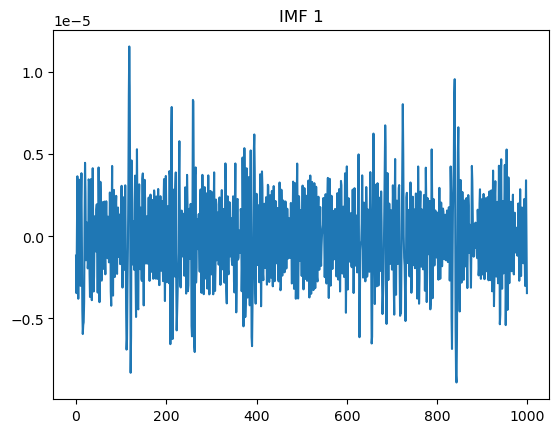

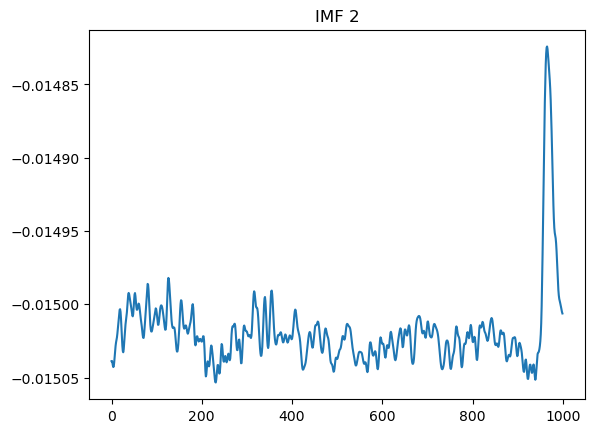

In [11]:
for i, imf in enumerate(IMFs):
    plt.figure()
    plt.plot(imf)
    plt.title(f"IMF {i+1}")
    plt.show()

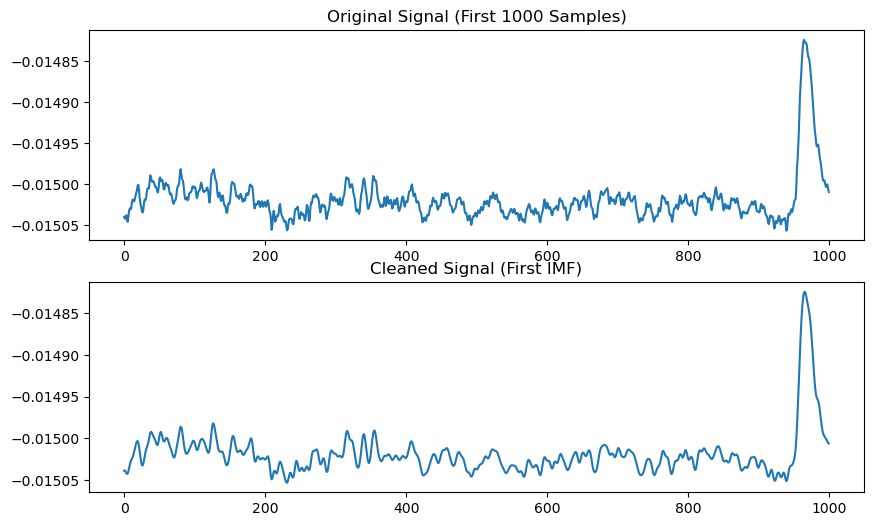

In [27]:
# Select the first IMF (low-frequency component)
cleaned_signal = IMFs[1]  # Second IMF contains true signal

# Plot the original and cleaned signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title("Original Signal (First 1000 Samples)")

plt.subplot(2, 1, 2)
plt.plot(cleaned_signal)
plt.title("Cleaned Signal (First IMF)")

plt.show()

In [29]:
original_energy = sum(signal**2)
imfs_energy = sum([sum(imf**2) for imf in IMFs])

print(f"Original Energy: {original_energy}")
print(f"IMFs Energy: {imfs_energy}")


Original Energy: 0.225567281090976
IMFs Energy: 0.22556586045431368


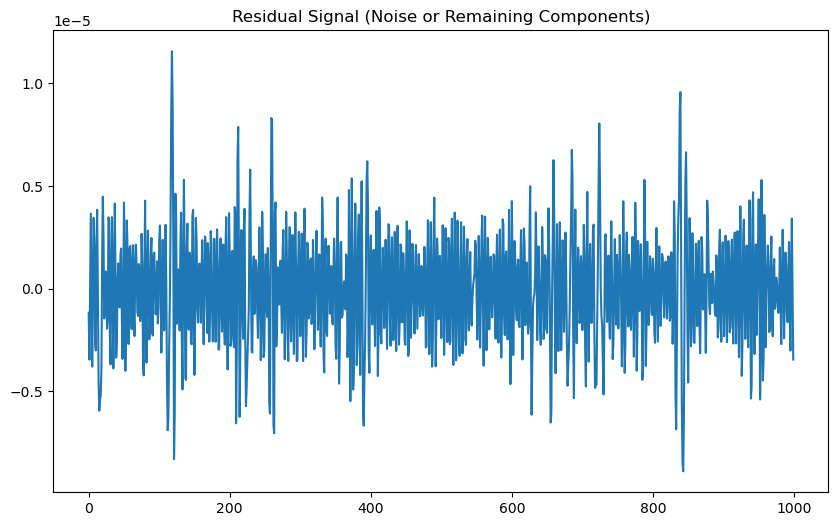

In [31]:
# Calculate the residual signal (difference between original and cleaned)
residual_signal = signal - cleaned_signal

# Plot the residual signal to see what has been removed
plt.figure(figsize=(10, 6))
plt.plot(residual_signal)
plt.title("Residual Signal (Noise or Remaining Components)")
plt.show()


In [33]:
# Calculate the energy of the original, cleaned, and residual signals
original_energy = sum(signal**2)
cleaned_energy = sum(cleaned_signal**2)
residual_energy = sum(residual_signal**2)

print(f"Original Energy: {original_energy}")
print(f"Cleaned Signal Energy: {cleaned_energy}")
print(f"Residual Signal Energy: {residual_energy}")


Original Energy: 0.225567281090976
Cleaned Signal Energy: 0.2255658532271232
Residual Signal Energy: 7.227190475288648e-09


In [35]:
# [...] (Your existing code for EMD decomposition and energy calculations)

# Calculate Signal-to-Noise Ratio (SNR) in decibels (dB)
snr_db = 10 * np.log10(cleaned_energy / residual_energy)  # SNR = 10*log10(Signal Power / Noise Power)

print("\n--- Signal-to-Noise Ratio (SNR) ---")
print(f"SNR: {snr_db:.1f} dB")
print("Interpretation:")
print("- SNR > 20 dB: Good artifact removal")
print("- SNR > 40 dB: Excellent removal")
print("- SNR < 10 dB: Poor removal (artifacts still dominant)")


--- Signal-to-Noise Ratio (SNR) ---
SNR: 74.9 dB
Interpretation:
- SNR > 20 dB: Good artifact removal
- SNR > 40 dB: Excellent removal
- SNR < 10 dB: Poor removal (artifacts still dominant)
